## Load Data

In [1]:
from sklearn.model_selection import train_test_split
import datasets_util as du

#train_catalog, _ = du.get_gz2(True)
#test_catalog, _ = du.get_gz2(False)

# pick a small amount of the full dataset, splitting for train/test
full_catalog, _ = du.get_full_gz2()
small_catalog = full_catalog.iloc[:10000,:]
train_catalog, test_catalog = train_test_split(small_catalog, random_state=1)

## Preprocess Data

In [2]:
import target_formatter as tgf

# Get encodings of y data
y_encoder = tgf.get_summary_encoder(train_catalog)
y_train, y_test = tgf.get_train_test_summary_enc(y_encoder, train_catalog, test_catalog)

In [3]:
# create datasets from file paths & encoded y
train_ds = du.get_dataset(train_catalog["file_loc"], y_train, 224)
test_ds = du.get_dataset(test_catalog["file_loc"], y_test, 224)

## Create CNN Model

In [4]:
# Import function from cnn_model.py
from cnn_model import create_cnn_model

# Define parameters
# TODO get input shape from dataset, or have parameter used here & in dataset creation
input_shape = (224, 224, 3)
# TODO dataset holds labels, can it provide the target size?
num_classes = y_train.shape[1]

# Create CNN model
model = create_cnn_model(input_shape, num_classes)

# Display the model summary
model.summary()

c:\ProgramData\anaconda3\envs\dev\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,992 (42.61 MB)

 Trainable params: 11,169,992 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [5]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.3345 - loss: 1.7781 - val_accuracy: 0.3972 - val_loss: 1.6361
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.4088 - loss: 1.5253 - val_accuracy: 0.4600 - val_loss: 1.4100
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.4855 - loss: 1.3235 - val_accuracy: 0.4876 - val_loss: 1.2691
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.5568 - loss: 1.1536 - val_accuracy: 0.5036 - val_loss: 1.2397
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.5977 - loss: 1.0596 - val_accuracy: 0.4916 - val_loss: 1.3178
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.6164 - loss: 0.9765 - val_accuracy: 0.4868 - val_loss: 1.4134
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.6732 - loss: 0.8640 - val_accuracy: 0.5032 - val_loss: 1.5119
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.7106 - loss: 0.7631 - val_accuracy: 0.5152 - v

## Evaluate Model

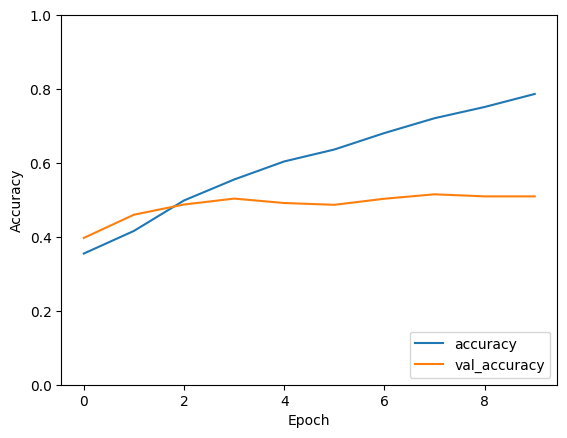

In [6]:
# Plot history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# NEED TO ADD CODE FOR SAVING MODEL

In [ ]:
# Do we put the following code in a separate .py file????

from tensorflow.keras.models import load_model

# Load the Trained model file into the environment.
model = load_model(Resources/saved_models/<name_of_model.h5>)

In [ ]:
# Prepare new images
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0, 1] if necessary
    return img_array

img_path = '/Resources/new_images/image.jpg'
processed_img = preprocess_image(img_path, target_size=(height, width))

In [ ]:
predictions = model.predict(processed_img)

# If your model outputs probabilities, you might want to find the category with the highest probability:
predicted_class = np.argmax(predictions, axis=-1)

In [ ]:
# Assuming img_paths is a list of paths to your images
batch = np.vstack([preprocess_image(img_path, target_size=(height, width)) for img_path in img_paths])

predictions = model.predict(batch)
predicted_classes = np.argmax(predictions, axis=-1)

# Map predicted class indices to class names
predicted_labels = [class_names[i] for i in predicted_classes]